In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Ratings**

In [30]:
ratings = pd.read_csv('data/u.data',sep='\t',names=['user_id', 'movie_id', 'rating', 'timestamp'])
ratings.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


# **Movies**

In [31]:
movies = pd.read_csv('data/u.item', sep='|', encoding='latin-1',usecols=[0, 1, 2],names=['movie_id', 'title', 'genres'])
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),01-Jan-1995
1,2,GoldenEye (1995),01-Jan-1995
2,3,Four Rooms (1995),01-Jan-1995
3,4,Get Shorty (1995),01-Jan-1995
4,5,Copycat (1995),01-Jan-1995


In [32]:
print(ratings.shape)
print(ratings.size)
print(movies.shape)
print(movies.size)

(100000, 4)
400000
(1682, 3)
5046


In [33]:
ratings.isnull().sum()
movies.isnull().sum()

movie_id    0
title       0
genres      1
dtype: int64

# **Cleaning Data**

In [34]:
ratings.dropna(inplace=True)
movies.dropna(inplace=True)

ratings.drop_duplicates(subset=['user_id','movie_id'],inplace=True)
ratings = ratings[ratings['rating'].between(1, 5)]

In [35]:
movies['genres'] = movies['genres'].str.split('|')
print(movies.head())

   movie_id              title         genres
0         1   Toy Story (1995)  [01-Jan-1995]
1         2   GoldenEye (1995)  [01-Jan-1995]
2         3  Four Rooms (1995)  [01-Jan-1995]
3         4  Get Shorty (1995)  [01-Jan-1995]
4         5     Copycat (1995)  [01-Jan-1995]


In [36]:
movies['genres'] = movies['genres'].apply(lambda x: ['Unknown'] if not x else x)

# **Transforming Data**

In [37]:
user_movie_matrix = ratings.pivot(index='user_id',columns='movie_id',values='rating')
user_movie_matrix

movie_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,2.0,NaN,NaN,4.0,5.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# Number of ratings per user
user_ratings_count = ratings.groupby('user_id').size()
print(user_ratings_count.describe())

count    943.000000
mean     106.044539
std      100.931743
min       20.000000
25%       33.000000
50%       65.000000
75%      148.000000
max      737.000000
dtype: float64


# **Merging Datasets**

In [39]:
ratings_with_movies = ratings.merge(movies, on='movie_id', how='left')
print(ratings_with_movies.head())

   user_id  movie_id  rating  timestamp                       title  \
0      196       242       3  881250949                Kolya (1996)   
1      186       302       3  891717742    L.A. Confidential (1997)   
2       22       377       1  878887116         Heavyweights (1994)   
3      244        51       2  880606923  Legends of the Fall (1994)   
4      166       346       1  886397596         Jackie Brown (1997)   

          genres  
0  [24-Jan-1997]  
1  [01-Jan-1997]  
2  [01-Jan-1994]  
3  [01-Jan-1994]  
4  [01-Jan-1997]  


# **Top Rated Movies**

In [40]:
movie_stats = ratings_with_movies.groupby(['movie_id', 'title'])['rating'].agg(['mean', 'count'])
top_movies = movie_stats[movie_stats['count'] >= 50].sort_values('mean', ascending=False)
print(top_movies.head(10))


                                                                 mean  count
movie_id title                                                              
408      Close Shave, A (1995)                               4.491071    112
318      Schindler's List (1993)                             4.466443    298
169      Wrong Trousers, The (1993)                          4.466102    118
483      Casablanca (1942)                                   4.456790    243
114      Wallace & Gromit: The Best of Aardman Animation...  4.447761     67
64       Shawshank Redemption, The (1994)                    4.445230    283
603      Rear Window (1954)                                  4.387560    209
12       Usual Suspects, The (1995)                          4.385768    267
50       Star Wars (1977)                                    4.358491    583
178      12 Angry Men (1957)                                 4.344000    125


In [41]:
ratings_with_movies['genres'] = ratings_with_movies['genres'].apply(lambda x: x if isinstance(x, list) else ['Unknown'])
exploded = ratings_with_movies.explode('genres')
genre_stats = exploded.groupby('genres')['rating'].agg(['mean', 'count']).sort_values('count', ascending=False)
print(genre_stats)

                 mean  count
genres                      
01-Jan-1995  3.333568   9932
01-Jan-1994  3.425084   8890
01-Jan-1997  3.459452   7078
01-Jan-1993  3.524861   6657
01-Jan-1989  3.716102   2360
...               ...    ...
26-Apr-1986  3.000000      1
26-Oct-1996  1.000000      1
28-Feb-1996  3.000000      1
30-Apr-1997  2.000000      1
4-Feb-1971   1.000000      1

[241 rows x 2 columns]


In [42]:
user_stats = ratings.groupby('user_id')['movie_id'].count()
print(user_stats.describe())

count    943.000000
mean     106.044539
std      100.931743
min       20.000000
25%       33.000000
50%       65.000000
75%      148.000000
max      737.000000
Name: movie_id, dtype: float64


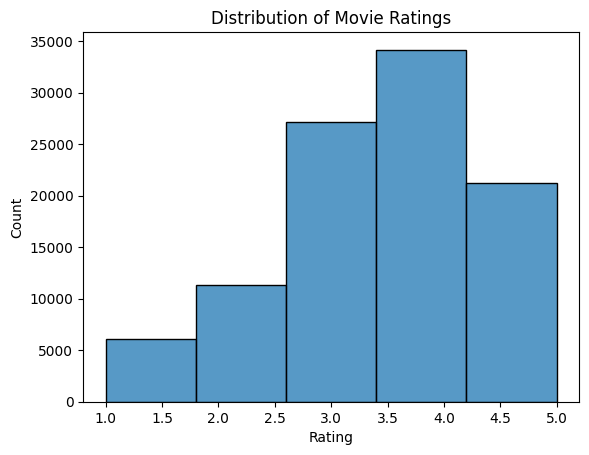

In [43]:
sns.histplot(ratings['rating'], bins=5, kde=False)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('rating_distribution.png')
plt.show()

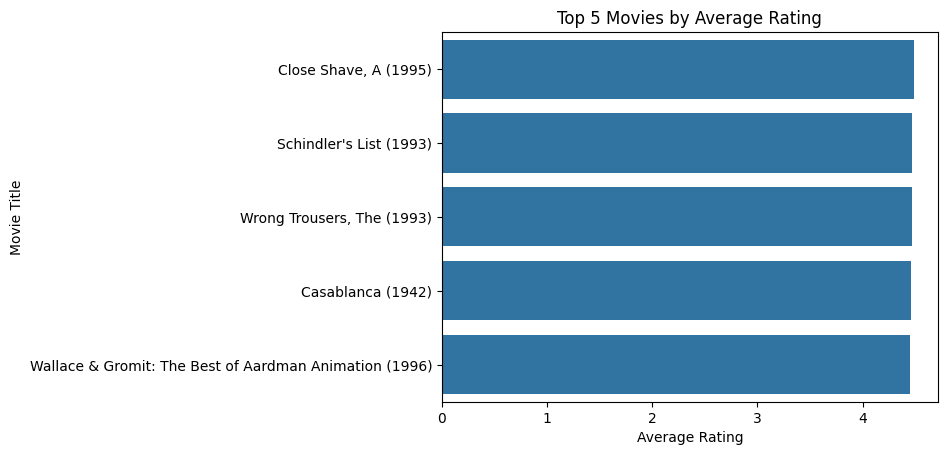

In [44]:
top_5 = top_movies.head(5).reset_index()
sns.barplot(x='mean', y='title', data=top_5)
plt.title('Top 5 Movies by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.savefig('top_movies.png')
plt.show()

# **Saving**

In [46]:
user_movie_matrix.to_csv('user_movie_matrix.csv')
ratings_with_movies.to_csv('ratings_with_movies.csv', index=False)
top_movies.to_csv('top_movies.csv')
genre_stats.to_csv('genre_stats.csv')